In [29]:
from matplotlib import pyplot as plt
from functools import reduce
import numpy as np
import math
np.random.seed(1111111)

n_walkers = 10000           # total number of random walkers
step = 1e-3                 # step length of each walker
iters = 1000                # total number of steps taken by each random walker

walkers_sub = 1000

### Final locations of all walkers

Simulated motion of multiple random walkers and storing the steps in 2D array

First we took 1 random number (say t) in [0,1). 

Then $z = \text{floor}(2t) \in \{0,1\}$ with equal probability.

So, $(2z-1)\text{step} \in \{-\text{step},\text{step}\}$ with equal probability.


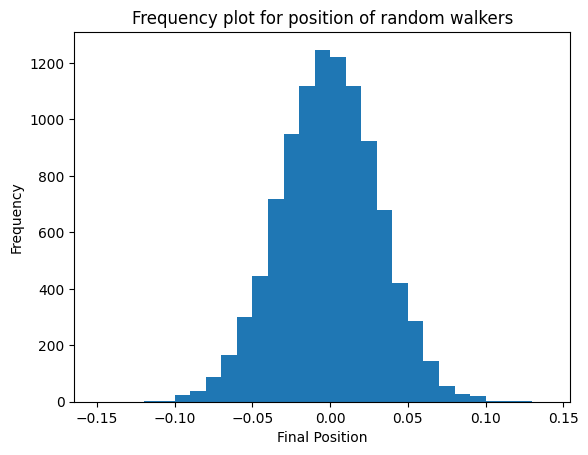

In [30]:
individual_moves = np.zeros(shape=(n_walkers,iters))
for i in range(n_walkers):
    individual_moves[i] = [(2*math.floor(j*2)-1)*step for j in np.random.random(iters)]
final_pos = [np.sum(i) for i in individual_moves]

name = "Frequency plot for position of random walkers"
plt.hist(final_pos, bins=np.arange(-0.15, 0.15, 0.01))
plt.xlabel("Final Position")
plt.ylabel("Frequency")
plt.title(name)
plt.savefig(f'../results/q3/{name}.svg')
plt.show()

### Plotting path of random walks

We cumulatively added the steps of each random walker to get the position array.

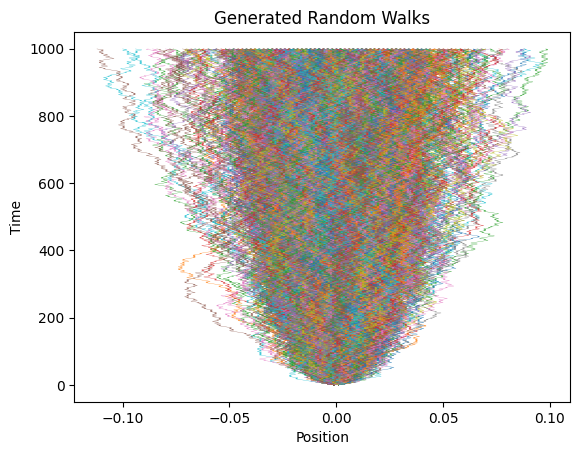

In [31]:
paths = np.zeros(shape=(1000, iters))

for i in range(1000):
    paths[i] = np.cumsum(individual_moves[i])
    plt.plot(paths[i], list(range(iters)), linewidth=0.2)

name = "Generated Random Walks"
plt.xlabel("Position")
plt.ylabel("Time")
plt.title(name)
plt.savefig(f'../results/q3/{name}.svg')
plt.show()

### Mean and Variance (Calculated and True)

True mean = 0

True variance = $\text{N}.\text{step}^2$

In [32]:
calc_mean = np.mean(final_pos)
calc_variance = np.var(final_pos)

true_variance = iters*(step*step)

print(f"Calculated Mean: {calc_mean}")
print(f"Calculated Variance: {calc_variance}")
print(f"True Mean: {0}")
print(f"True Variance: {true_variance}")

print(f"Error between true variance and calculated mean is {abs(calc_mean)}")
print(f"Error between true variance and calculated variance is {abs(true_variance-calc_variance)}")

Calculated Mean: 9.420000000000008e-05
Calculated Variance: 0.0010068147263600001
True Mean: 0
True Variance: 0.001
Error between true variance and calculated mean is 9.420000000000008e-05
Error between true variance and calculated variance is 6.814726360000094e-06
